In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('financial_source.xlsx',sheet_name='Quarter Source')
df['year_quater'] = df['Year'].dt.year.astype(str) + ",Q" + df['Year'].dt.quarter.astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Year                         18 non-null     datetime64[ns]
 1   Revenue                      18 non-null     int64         
 2   Gross Profit                 18 non-null     int64         
 3   Operating Profit             18 non-null     int64         
 4   Profit Before Tax            18 non-null     int64         
 5   Net Profit                   18 non-null     int64         
 6   Cost of Sales                18 non-null     int64         
 7   Total Assets                 18 non-null     int64         
 8   Total Liabilities            18 non-null     int64         
 9   Total ShareHolder's Equity   18 non-null     int64         
 10  Current Assets               18 non-null     int64         
 11  Current Liabilities          18 non-null     in

In [2]:
df_piv = df.groupby('year_quater').agg(
    cfi=('Cash From Investing','sum'),
    cff=('Cash From Financing','sum'),
    cfo=('Cash From Operating','sum'),
    ceb=('Cash or Equivalent Balance','sum')
)
# df_piv = df.pivot_table(
#     index='year_quater',
#     values=['Cash From Operating', 'Cash From Investing', 'Cash From Financing'],
#     aggfunc='sum'
# )

df_piv.head()

,cfi,cff,cfo,ceb
year_quater,,,,
"2020,Q1",-5282,-12716,106737,164935
"2020,Q2",-80454,-21136,275198,249831
"2020,Q3",-171593,-25314,395554,274846
"2020,Q4",-299781,150989,307203,234613
"2021,Q1",-34260,-19966,178849,359236


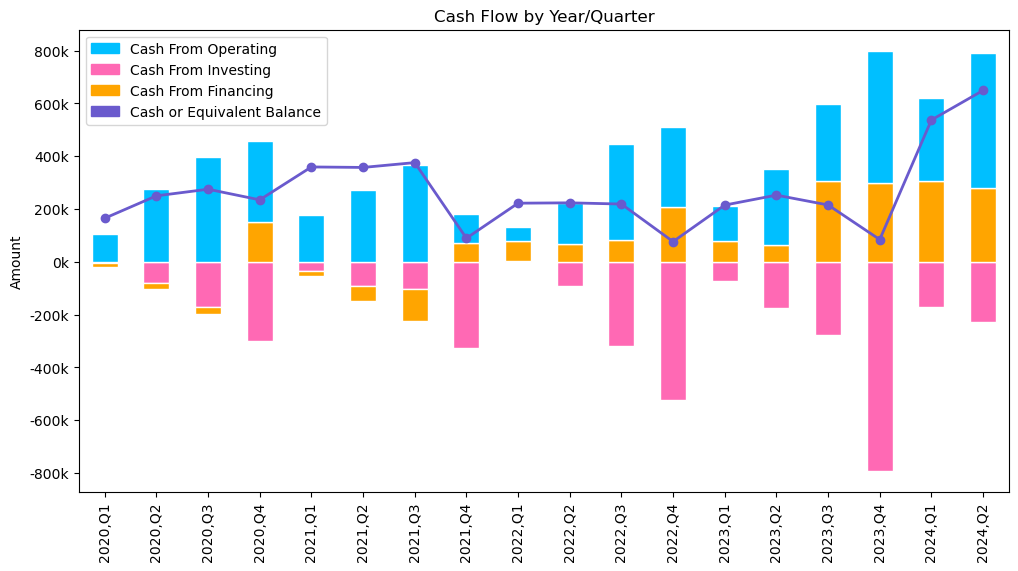

In [3]:
from matplotlib.patches import Patch

custom_colors = ['hotpink', 'orange', 'deepskyblue']

ax = df_piv.iloc[:,:3].plot.bar(stacked=True,figsize=(12,6), color=custom_colors,edgecolor='white')

ax.plot(df_piv.index, df_piv['ceb'], color='slateblue', linewidth=2, marker='o', label='Cash or Equivalent Balance')

# Add titles and labels
plt.title('Cash Flow by Year/Quarter')
plt.ylabel('Amount')
plt.xlabel('')

# Format the y-axis to display values in thousands (k)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x/1000:.0f}k'))

cfo = Patch(label='Cash From Operating',color='deepskyblue')
cfi = Patch(label='Cash From Investing',color='hotpink')
cff = Patch(label='Cash From Financing',color='orange')
ceb = Patch(label='Cash or Equivalent Balance',color='slateblue')

plt.legend(handles=[cfo, cfi,cff,ceb])

plt.show()

In [4]:
import plotly.graph_objects as go

fig = go.Figure()

# Add the stacked bars
fig.add_trace(go.Bar(
    x=df_piv.index, y=df_piv['cfo'],
    name='Cash From Operating', hovertemplate='Cash From Operating: %{y}<extra></extra>'
))
fig.add_trace(go.Bar(
    x=df_piv.index, y=df_piv['cff'],
    name='Cash From Financing', hovertemplate='Cash From Financing: %{y}<extra></extra>'
))
fig.add_trace(go.Bar(
    x=df_piv.index, y=df_piv['cfi'],
    name='Cash From Investing', hovertemplate='Cash From Investing: %{y}<extra></extra>'
))
# Add the line for Cash or Equivalent Balance
fig.add_trace(go.Scatter(
    x=df_piv.index, y=df_piv['ceb'],
    mode='lines+markers', name='Cash or Equivalent Balance',
    hovertemplate='Cash or Equivalent Balance: %{y}<extra></extra>'
))

fig.update_layout(
    barmode='stack',
    title='Cash Flow by Year/Quarter',
    xaxis_title='',
    yaxis_title='Amount',
    hovermode='x unified'
)
fig.update_layout(height=800)

fig.show()